<center>   
<h1> Examen Final: Introducción al Machine Learning </h1>
</center>



<center>
<img src="ods_stickers.jpg" />

Docentes: [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/) y [José Robledo](https://jorobledo.github.io/). 

Fecha final de entrega: 15 de diciembre 2021

In [1]:
# Paquetes indispensables
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Metricas y Cross validation
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Modelado
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier

# PCA
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

<center>
<img src="mbappe.jpg" />


<h2>
La base de datos sobre la cual trabajaremos será la base de datos FIFA2022 que se encuentra en el archivo 'players_22.csv'.

Estas son las posiciones de los jugadores listados en el archivo Fifa22

https://www.kaggle.com/stefanoleone992/fifa-22-complete-player-dataset


 El objetivo del trabajo es predecir la posicion general en el campo  de juego (Defensor, Mediocampista, Atacante) a partir de sus atributos generales. Las posiciones serán categorizadas de la siguiente manera (utilizar los colores indicados cuando se refiera a cada clase):  


**Arqueros**: Naranja

- GK: Goalkeeper

**Defensores**: Amarillo

- CB: Center-back
- LCB: Left center-back
- RCB: Right center-back
- LB: Left-back (Full-back)
- RB: Right-back (Full-back)

**Mediocampista**: Verde

- CM : Centre midfield
- LDM: Left center midfield
- LAM: Left attacking midfield
- RDM: Right center midfield
- RAM: Right attacking midfield
- CDM: Centre defensive midfield
- CAM: Centre attacking midfield
- LM : Left midfield
- RM : Right midfield

**Delantero**: Azul

- ST: Striker
- CF: Center forward
- LW: Left winger
- RW: Right winger

</h2>


## Este es un dataset con muchos NAN y campos vacios por lo cual hay que estudiar y corregir el dataset antes de correr los algoritmos.

### 1.) a.) Explique qué procedimiento se está realizando en las siguientes casillas.

In [2]:
data = pd.read_csv('players_22.csv')

arquero = ['GK']
defensor = ['CB', 'LCB', 'RCB', 'LB' , 'RB']
mediocampista = ['CM', 'LDM', 'LAM', 'RDM', 'CDM', 'CAM', 'LM', 'RM']
atacante = ['ST', 'CF', 'LW', 'RW']

data['posicion'] = ''
for i, posicion_del_jugador in enumerate(data['player_positions']):
    for posicion in arquero:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'arquero'
    for posicion in defensor:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'defensor'
    for posicion in mediocampista:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'mediocampista'
    for posicion in atacante:
        if posicion in posicion_del_jugador:
            data.loc[i, 'posicion'] = 'atacante'           

C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


En esta casilla lo que se procede a realizar es definir las clases generales en las que estamos interesados en clasificar a los jugadores (arquero, defensor, mediocampista y delantero) a partir de las especificas que conforman un numero mayor de clases. 
A partir de el bucle for lo que se hace es comparar si la categoria especifica se encuentra contenida dentro de las que definien la general, luego si se encuentra contenida al jugador se le atribuye la general. A partir de este procedimiento se crea una nueva variable que contiene las 4 categorias generales en las que queremos clasificar para cada jugador. 

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 103 entries, sofifa_id to posicion
dtypes: float64(9), int64(39), object(55)
memory usage: 15.1+ MB


Text(0.5, 1.0, 'Posicion del jugador')

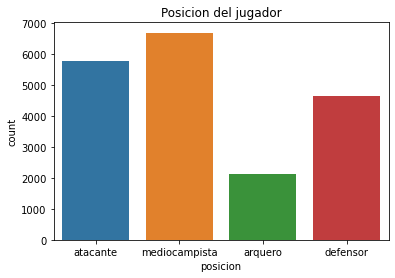

In [3]:
# Creo la visualizacion grafica que permite analizar la cantidad de jugadores por posicion.
sns.countplot(x=data["posicion"]).set_title("Posicion del jugador")

Como resultado de lo que se ejecuto en la casilla anterior podemos hacer un plot de la nueva variable creada "posicion" que contiene las cuatro categorias generales. Podemos ver que la posicion con mayor cantidad de jugadores es la de mediocampista, seguida por la de atacante, luego los defensores y finalmente la minoritaria es la de arquero. Podemos ver de que se trata un set de datos desbalanceado en funcion de la cantidad de datos por clase. 

In [3]:
nans = data.isna().sum().sort_values(ascending=False)
print(nans[nans!=0]/data.shape[0])

nation_jersey_number         0.960549
nation_logo_url              0.960549
nation_position              0.960549
nation_team_id               0.960549
club_loaned_from             0.942721
player_tags                  0.925100
goalkeeping_speed            0.889183
player_traits                0.511513
dribbling                    0.110817
shooting                     0.110817
passing                      0.110817
physic                       0.110817
defending                    0.110817
pace                         0.110817
release_clause_eur           0.061126
club_joined                  0.060450
value_eur                    0.003846
club_contract_valid_until    0.003171
league_level                 0.003171
club_jersey_number           0.003171
club_position                0.003171
league_name                  0.003171
club_name                    0.003171
wage_eur                     0.003171
club_logo_url                0.003171
club_flag_url                0.003171
club_team_id

En esta casilla lo que se hace es crear una lista descendente de la cantidad de valores ausentes que hay en cada una de las variables. 
Finalmente se imprime el porcentaje de valores ausentes que hay en cada una de las variables.
Podemos ver que hay variables con un gran porcentaje de valores ausentes y esto debe ser tratado de alguna forma. 

In [4]:
drop_vars = nans[list(nans/data.shape[0] > 0.5)].keys()
for var in drop_vars:
    print(var)
    data.drop(var,inplace=True,axis=1)

nation_jersey_number
nation_logo_url
nation_position
nation_team_id
club_loaned_from
player_tags
goalkeeping_speed
player_traits


En esta casilla lo que se procede a realizar es filtrar las variables que poseen un porcentaje de valores ausentes mayor al 50% y se guarda su llave identificatoria. Luego se eliminan las variables que poseen un porcentaje de valores ausentes mayor al 50% y ademas se imprime los nombres de las mismas. 

In [5]:
data.fillna(data.mean(), inplace=True)

C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Se reemplazan los valores ausentes en las variables que menores porcentajes de datos ausentes poseen, es decir las que no fueron eliminadas de las base de datos, por la media de la variable como forma de imputacion. 

In [6]:
categorical_variables = ['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'dob',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk',
 'player_face_url',
 'club_logo_url',
 'club_flag_url',
 'nation_flag_url',
 'posicion']


for val in data:
    if val in categorical_variables:
        data[val]=data[val].astype('object')
    else:
        pd.to_numeric(data[val], downcast="float")

Se crea un array de las variables categoricas.
Luego se crea un bucle for que recorre los nombres de las variables en la base de datos.
Si la variable es una de las que se encuentra dentro de las variables categoricas, entonces se transforma a un objeto.
En caso de no ser una de las variables categoricas entonces lo que se hace es transformarla en numerica flotante.

In [7]:
X = data.loc[:,data.dtypes != 'object']

Se seleccionan todas las variables numericas presentes en el data frame de datos para ser usadas como variables predictoras. Es decir las variables categoricas son filtradas y dejadas fuera de los predictores. 

In [8]:
y = data['posicion']

Se separa la variable respuesta para ser predicha en los futuros modelos. 

In [9]:
X.shape[1] == X.select_dtypes(include=np.number).shape[1]

True

Verifico que todas la columnas sean numericas y esto se cumple. 

In [19]:
a=pd.DataFrame(X)
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      19239 non-null  int64  
 1   potential                    19239 non-null  int64  
 2   value_eur                    19239 non-null  float64
 3   wage_eur                     19239 non-null  float64
 4   age                          19239 non-null  int64  
 5   height_cm                    19239 non-null  int64  
 6   weight_kg                    19239 non-null  int64  
 7   release_clause_eur           19239 non-null  float64
 8   pace                         19239 non-null  float64
 9   shooting                     19239 non-null  float64
 10  passing                      19239 non-null  float64
 11  dribbling                    19239 non-null  float64
 12  defending                    19239 non-null  float64
 13  physic          

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      19239 non-null  int64  
 1   potential                    19239 non-null  int64  
 2   value_eur                    19239 non-null  float64
 3   wage_eur                     19239 non-null  float64
 4   age                          19239 non-null  int64  
 5   height_cm                    19239 non-null  int64  
 6   weight_kg                    19239 non-null  int64  
 7   release_clause_eur           19239 non-null  float64
 8   pace                         19239 non-null  float64
 9   shooting                     19239 non-null  float64
 10  passing                      19239 non-null  float64
 11  dribbling                    19239 non-null  float64
 12  defending                    19239 non-null  float64
 13  physic          

### 2. a) Realice el análisis exploratorio que crea adecuado sobre la base de datos FIFA 2022 en donde explique cada paso que realiza.

### Cantidad de jugadores por posicion

C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


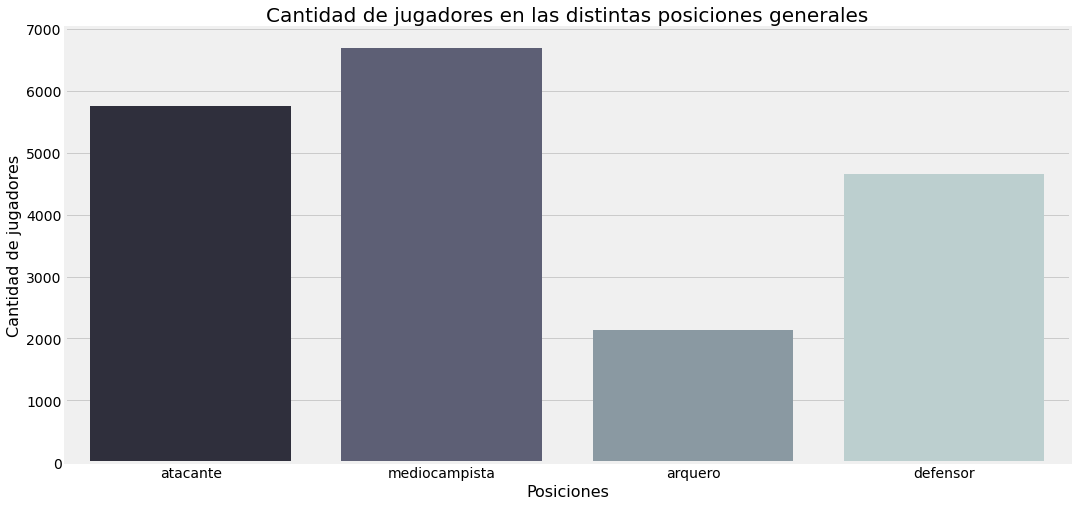

In [25]:
# Visualizacion de cantidad de jugadores por posicion: 
plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('posicion', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Posiciones', fontsize = 16)
ax.set_ylabel(ylabel = 'Cantidad de jugadores', fontsize = 16)
ax.set_title(label = 'Cantidad de jugadores en las distintas posiciones generales', fontsize = 20)
plt.show()

Podemos ver que la posicion con mayor cantidad de jugadores es la de mediocampista, seguida por la de atacante, luego los defensores y finalmente la minoritaria es la de arquero. Podemos ver de que se trata un set de datos desbalanceado en funcion de la cantidad de datos por clase. 

In [27]:
data["posicion"].value_counts()

mediocampista    6689
atacante         5762
defensor         4656
arquero          2132
Name: posicion, dtype: int64

Vemos la cantidad exacta de jugadores en cada una de las posiciones generales. 

### Nombre de todas las variables

In [28]:
for col_name in data.columns: 
    print(col_name)

sofifa_id
player_url
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
club_team_id
club_name
league_name
league_level
club_position
club_jersey_number
club_joined
club_contract_valid_until
nationality_id
nationality_name
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defending_marking_awareness
defending_standing_tackle
defending_sliding_tac

Hago un print de el nombre de cada una de las variables para revisarlos y en caso de que necesite buscar algun nombre especifico lo copio de aqui. 

### Salario de cada jugador

C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


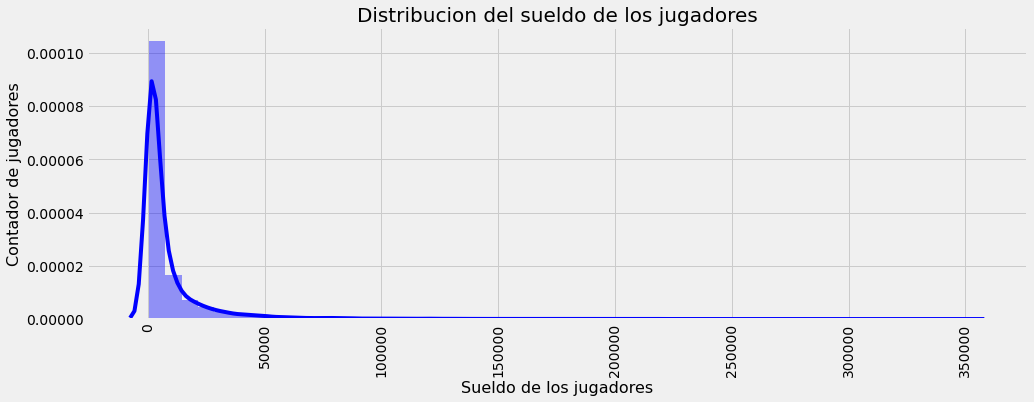

In [29]:
# Comparamos sueldos de los jugadores
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['wage_eur'], color = 'blue')
plt.xlabel('Sueldo de los jugadores', fontsize = 16)
plt.ylabel('Contador de jugadores', fontsize = 16)
plt.title('Distribucion del sueldo de los jugadores', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Podemos ver una distribucion asimetrica positiva para la variable de los sueldos. El mayor porcentaje de los jugadores tiene un sueldo menor a 50.000 euros, son pocos los que pasan este monto. 

### Tabla de descripcion general de cada una de las variables

In [30]:
data.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,release_clause_eur,pace,shooting,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,19239.000000,19239.000000,1.923900e+04,19239.000000,19239.000000,19239.000000,19239.000000,1.923900e+04,19239.000000,19239.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,5.374044e+06,68.213071,52.345297,...,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814
std,6.880232,6.086213,7.599043e+06,19439.284122,4.748235,6.863179,7.069434,1.448427e+07,10.309551,13.250149,...,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833
min,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.600000e+04,28.000000,18.000000,...,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,8.450000e+05,63.000000,44.000000,...,38.000000,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1.800000e+06,68.213071,52.345297,...,49.000000,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,70.000000,75.000000,2.100000e+06,8000.000000,29.000000,186.000000,80.000000,4.600000e+06,75.000000,62.000000,...,60.000000,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,3.735000e+08,97.000000,94.000000,...,93.000000,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000


A partir de esta tabla se puede concluir que el 75% de los jugadores cobra un sueldo menor o igual que 8000 euros. 

### Analisis de correlacion general

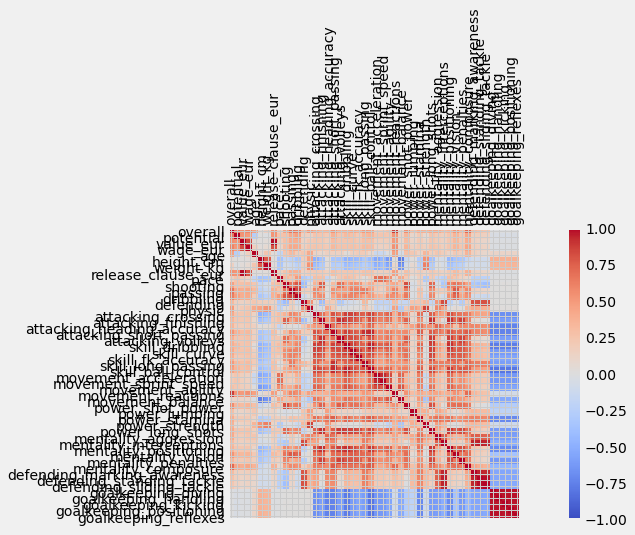

In [31]:
# Analisis de correlacion
corr = X.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns)
ax.set_yticklabels(X.columns)
plt.show()

A partir del grafico de correlacion podemos ver en terminos generales que existen muchas variables correlacionadas, por este motivo se sostiene que metodos de arbol como el random forest podrian obtener buenos resultados ya que en su algoritmo, al generar una seleccion aleatoria de variables en cada uno de los arboles del bosque combate este problema.

### Pie preferido del jugador

C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


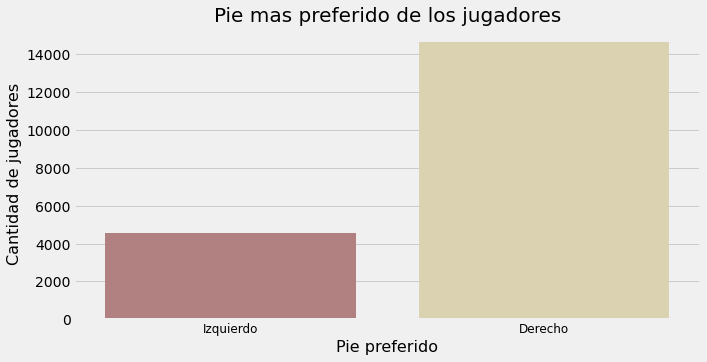

In [32]:
# Analizamos cuales jugadores son mas preferidos en funcion de su pie habil
plt.rcParams['figure.figsize'] = (10, 5)
a=sns.countplot(data['preferred_foot'], palette = 'pink')
plt.title('Pie mas preferido de los jugadores', fontsize = 20)
plt.ylabel('Cantidad de jugadores', fontsize = 16)
plt.xlabel('Pie preferido', fontsize = 16)
a.set_xticklabels(['Izquierdo', 'Derecho'], fontsize=12)
plt.show()

En este grafico podemos ver que el pie mas preferido en los jugadores es el pie derecho. 

### Mejor jugador por posicion

In [33]:
mejor_jugador_posicion=data.iloc[data.groupby(data['posicion'])['overall'].idxmax()][['posicion','long_name','overall']]
mejor_jugador_posicion

,posicion,long_name,overall
5,arquero,Jan Oblak,91
0,atacante,Lionel Andrés Messi Cuccittini,93
15,defensor,Virgil van Dijk,89
4,mediocampista,Kevin De Bruyne,91


En esta tabla podemos ver el mejor jugador dado por su desempeño general en cada una de las posiciones generales.

### 2.b) Grafique bloxplots de las siguientes variables por clase : ['Age','Overall','Potential','Stamina','Strength']


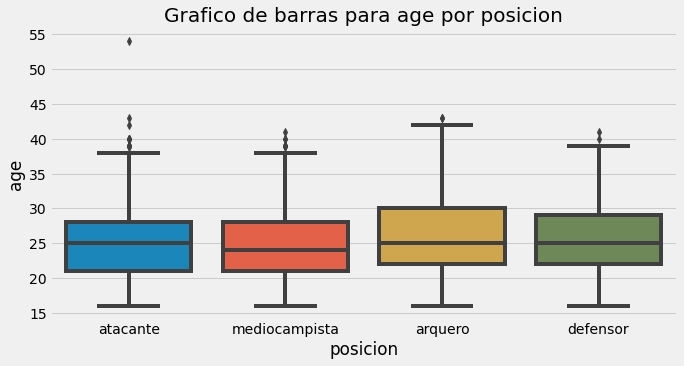

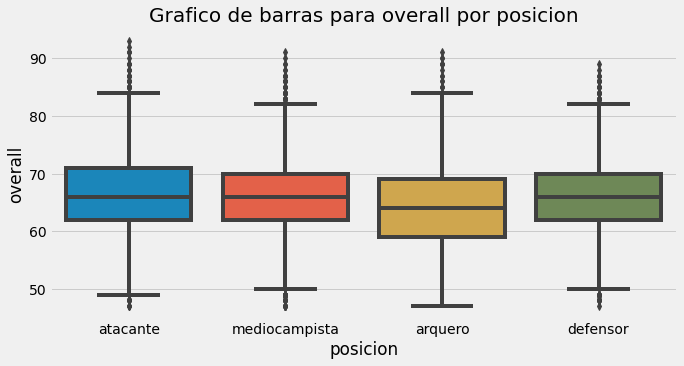

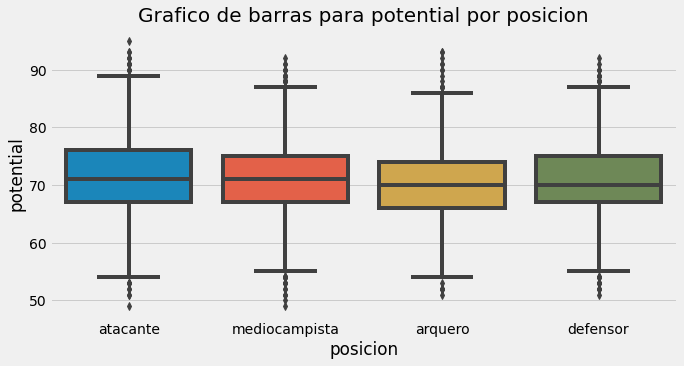

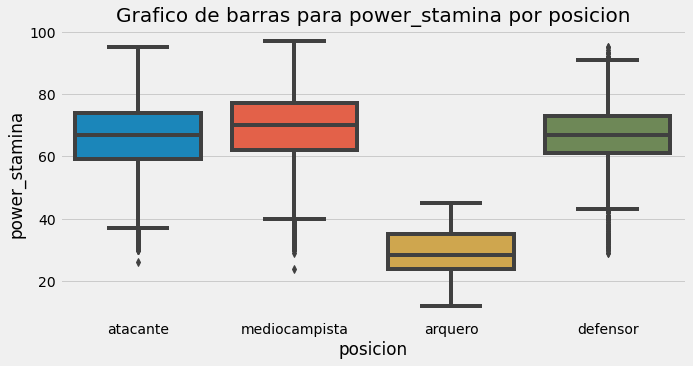

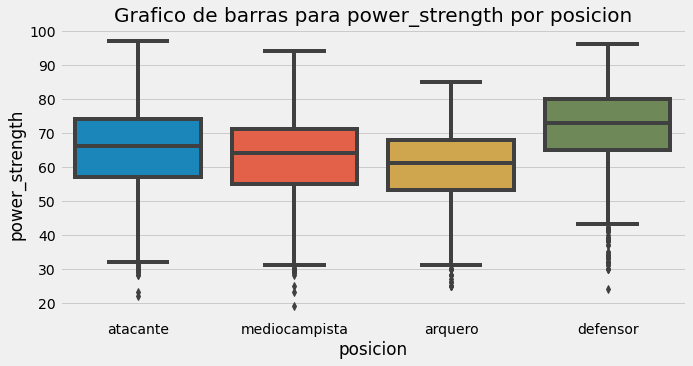

In [34]:
vars=['age','overall','potential','power_stamina','power_strength']
for i in vars:
    sns.boxplot(x=data['posicion'], y=data[i])
    plt.title('Grafico de barras para %s por posicion' %i, fontsize = 20)
    plt.show()


##### Hago una pequeña observacion de cada grafico:
- Podemos ver que la media de la variable age es superior en los arqueros y posee un mayor desvio. 
- Podemos ver que la media de la variable overall es inferior en los arqueros y para los outliers fuera de las cajas se corresponden con jugadores muy habilidosos. 
- Podemos ver que la media de la variable potential es superior en los atacantes y mediocampistas.
- Podemos ver que la media de la variable power_stamina es inferior en los arqueros y superios en las demas posiciones. 
- Podemos ver que la media de la variable power_strength es notablemente superior en los defensores.

### 2.c) Plotee diagramas de torta mostrando como se distribuyen los 8  paises con mas jugadores federados dentro de las clases 


In [35]:
nation_more_players=data.groupby(['nationality_name']).size().sort_values(ascending=False)
eight_nation_more_players=nation_more_players[0:7,]
print(eight_nation_more_players.keys())

Index(['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil',
       'Japan'],
      dtype='object', name='nationality_name')


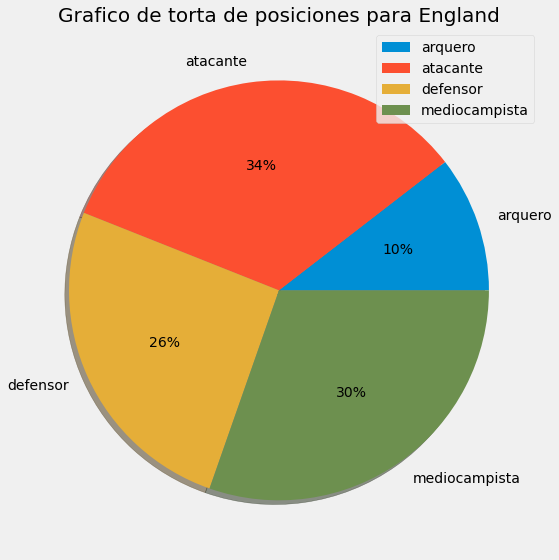

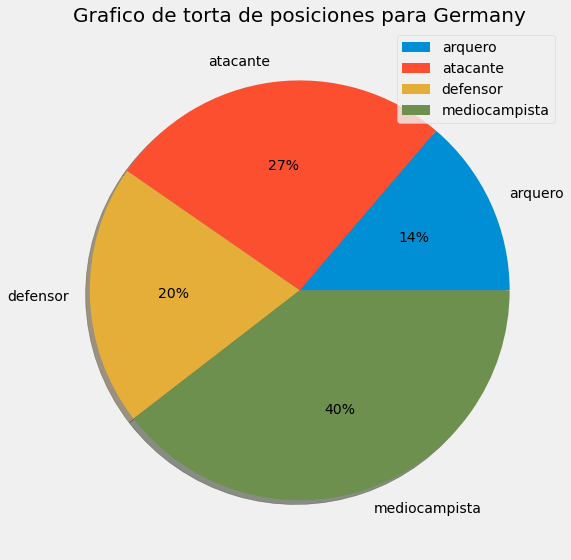

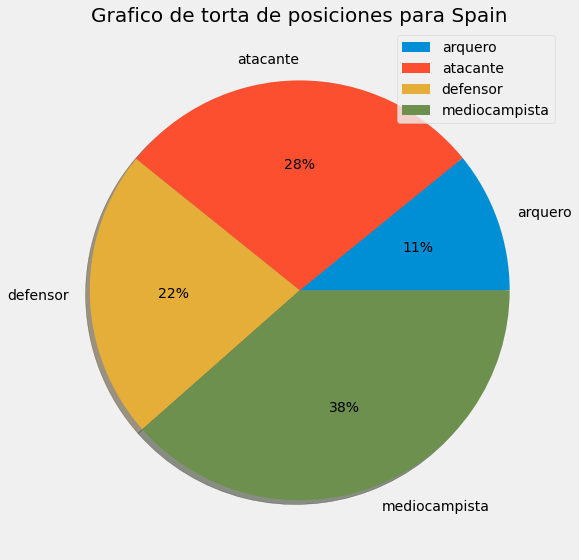

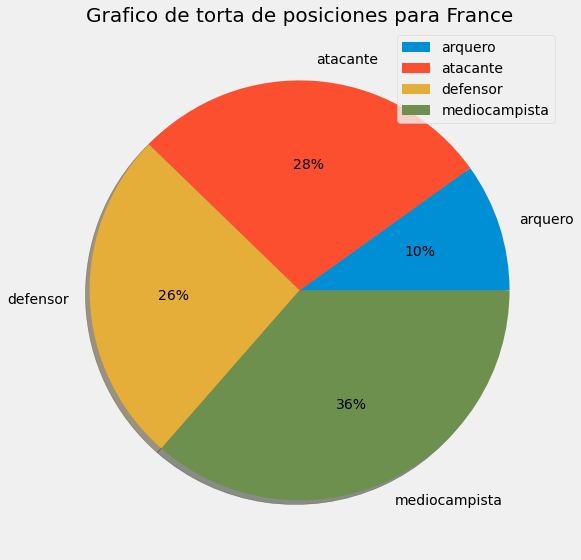

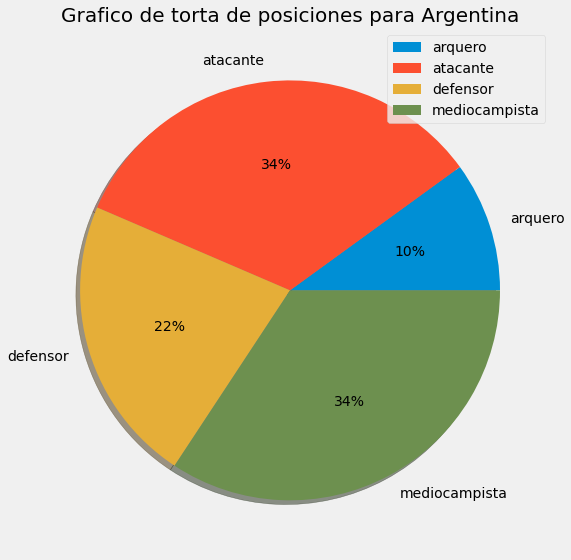

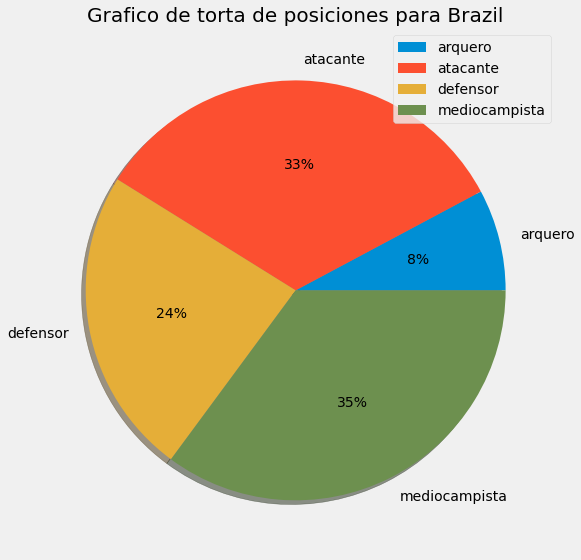

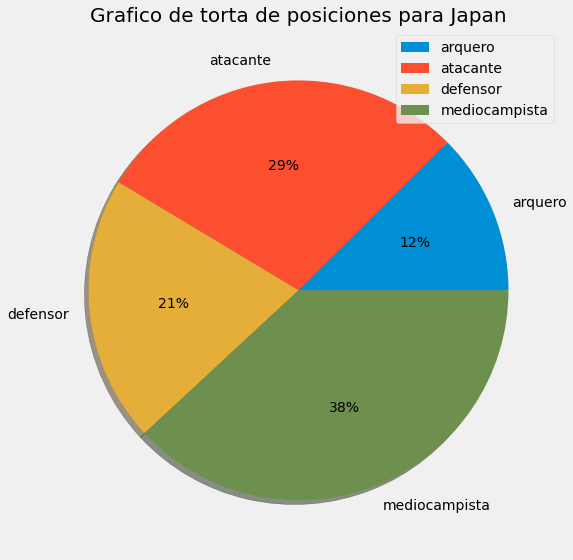

In [36]:
for i in eight_nation_more_players.keys():
    plt.rcParams['figure.figsize'] = (9, 9)
    datos=pd.DataFrame(data.loc[data['nationality_name'] == i].groupby(['posicion']).size())
    plt.pie(datos.iloc[:, 0].values, labels = ["arquero","atacante","defensor","mediocampista"], shadow = True, autopct='%.0f%%')
    plt.title('Grafico de torta de posiciones para %s' %i, fontsize = 20)
    plt.legend()
    plt.show()

Podemos ver que en todos los paises analizados la mayor proporcion de jugadores son los mediocampistas, seguidos por los atacantes, luego por los defensores y finalmente los arqueros. 

## 3)  Observando que los arqueros son bien distintos a las restantes posiciones, los descartaremos del conjunto de datos (también descartar las variables que son exclusivas de arqueros, es decir que tienen 'goalkeeping' en el nombre). Quedarse sólo con defensores, mediocampistas y atacantes. Se desea elegir el mejor método (entre los que se presentan a continuación) que clasifique a los jugadores en las 3 clases mencionadas. 

<h3>
Puede ayudarse con el siguiente material si lo desea.

https://www.youtube.com/watch?v=XXFLFWHP9Nc

https://www.youtube.com/watch?v=nuIqwnsrnH0

https://github.com/rasbt/stat451-machine-learning-fs20/tree/master/L11/code



###Ensemble Methods

- ensemble.RandomForestClassifier(),

###Nearest Neighbor

- neighbors.KNeighborsClassifier(),

###Trees    

- tree.DecisionTreeClassifier(),

###Discriminant Analysis

- discriminant_analysis.LinearDiscriminantAnalysis(),

- discriminant_analysis.QuadraticDiscriminantAnalysis(),

###xgboost: 

- XGBClassifier()  
  
    
Observe que los clasificadores estan descritos con sus parámetros default. Decida que parámetros va a usar para cada método, no tiene que elegirlos a todos, pero justifique su eleccion.
</h3>

### Parametros iniciales a conciderar

#### Random forest

Los valores iniciales de los parametros que vamos a conciderar son:
- n_estimators = 100, es uno de los parametros mas importantes de este clasificador, define el numero de arboles en el desierto. Podriamos pensar que a mayor cantidad de arboles mejores predicciones pero esto no solo podria llevarnos al overffiting en algun caso, si no que tambien aumentaria notablemente el tiempo que demoraria en construirse el modelo, por eso es que 100 es un buen numero para comenzar. 

- max_depth, gobierna la profundidad a la que puede crecer cada arbol dentro del decierto, es necesario no tomar valores muy altos para este parametro ya que al aumentar su valor el modelo mejora hasta un determinado punto y luego comineza a generar overfitting. Se deja este parametro como default = None con el objetivo de que lo nodos se expandan hasta que las hojas sean puras o bien hasta que contengan menos observaciones que el parametro min_samples_split.

- min_samples_split, especifica la cantidad minima de observaciones que deben existir en un nodo para dar origen a una divicion. Cuando toma valores pequeños puede llevar a overfitting, pero valores altos pueden llevar a underfitting. Tomamos como valor incial 3. 

#### K neighbours classifier

El parametro mas importante a conciderar en este metodo es n_neighbors que define al numero de vecinos a conciderar a la hora de determinar de que grupo proviene una determinada observacion. Cuando este parametro tiende a infinito llevaria a clasificar a todas las clases como la clase mayoritaria, por lo tanto exisitiria un gran sesgo (underfitting). Por otra parte, si tomase el valor de 1, se clasificaria cada punto como su vecino mas cercano, lo cual llevaria a un valor del error muy bajo en el set de datos de entrenamiento y la imposibilidad de generalizar a nuevos datos (overfitting). No existe una regla general para definir el valor de este parametro, depende de la aplicacion y del set de datos, por lo tanto se toma el numero default que es 5. 

#### Decision Tree Classifier

A diferencia del random forest este modelo contempla un solo arbol y no un desierto, por eso se espera que su rendimiento sea notablemente mas bajo. En el caso de random forest se reduce notablemente la varianza de este metodo al conciderar un desierto de arboles y promediar sus resultados o ejecutar mayority voting para obtener la prediccion final. Al ser el random forest un conjunto de decision tree classifiers comparten muchos parametros, de esta forma se concideraran los mismos valores iniciales que comparten ambos metodos.

- max_depth, gobierna la profundidad hasta la que puede crecer el arbol, es necesario no tomar valores muy altos para este parametro ya que al aumentar su valor el modelo se optimiza hasta un determinado punto y luego comineza a generar overfitting. Se deja este parametro como default = None con el objetivo de que lo nodos se expandan hasta que las hojas sean puras o bien hasta que contengan menos observaciones que el parametro min_samples_split.

- min_samples_split, especifica la cantidad minima de observaciones que deben existir en un nodo para dar origen a una divicion. Cuando toma valores pequeños puede llevar a overfitting, pero valores altos pueden llevar a underfitting. Tomamos como valor incial 3.

#### Linear Discriminant Analysis

Parametros a conciderar:
- solver = svd, esto hace referencia a "singular value decomposition". Es decir que no computa la matriz de covarianza de esta forma genera un menor costo computacional y es lo recomendado para bases de datos con muchas variables como en este caso.


#### Quadratic Discriminant Analysis

Los parametros definidos como default en el metodo de scikit learn me parecen optimos para inicializar este metodo. 
- priors =  las proporciones de las clases son inferidas a partir del set de datos de testeo y al realizar un muestreo estratificado esto respeta las proporciones de la base de datos total.

- reg_param = 0.0, regulariza lala estimacion de la covarianza por clase. 

- store_covariance = False. De esta forma nos ahorramos memoria y tenemos reservamos mayor capacidad de computo para que el algoritmo se ejecute mas rapido.

- tol = 1.0e-4, limite de significancia para conciderar una clase como singificativa. 

#### XGB Classifier

Es un metodo parecido a random forest, la diferencia entre estos es que el random forest proviende de los metodos que realizan bagging, mientras que este metodo es de la familia que realizan boosting. Tienen algunos parametros similares que vamos a fijar en los mismos valores iniciales para que sean comparables y a su vez definir un nuevo valor para un parametro muy importante.
- n_estimators: en este caso refiere al numero de rondas que realizara el boosting, tomamos 100.

- max_depth: gobierna la profundidad a la que puede crecer cada arbol, tomamos la default igual a 3. El valor es tan bajo porque este metodo busca generar pequeños arboles llamados stumps que generen clasficiaciones y luego corregir sus errores. 

- learning_rate (“eta”) o boosting learning rate, es el parametro que controla el aprendizaje que se realiza en cada paso. La mejoria generada en cada paso es multiplicada por el learning rate de forma de generar pequeñas mejorias en la direccion correcta. Valores bajos para este parametro llevarian al overfiting de manera muy lenta requieriendo mas iteraciones en el entrenamiento, por este motivo valores bajos son optimos para este parametro. 

Ademas de los metodos impuestos por el examen conciderare otros metodos simples de clasificacion para realizar una primera clasficiacion y comparar. Los otros algoritmos conciderados son: Logistic Regression, Quadratic Discriminant Analysis, Linear SVC y Gaussian Naive Bayes.


#### Elimino la categoria arqueros

In [22]:
datos=data[(data["posicion"]!='arquero')]

In [23]:
datos['posicion'].unique()

array(['atacante', 'mediocampista', 'defensor'], dtype=object)

#### Elimino las variables que comienzan con goalkeeping

In [24]:
datos = datos.loc[:, ~datos.columns.str.startswith('goalkeeping')]

#### Vuelvo a crear X e y luego de lo realizado:

In [25]:
X = datos.loc[:,datos.dtypes != 'object']
y = datos['posicion']

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17107 entries, 0 to 19238
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      17107 non-null  int64  
 1   potential                    17107 non-null  int64  
 2   value_eur                    17107 non-null  float64
 3   wage_eur                     17107 non-null  float64
 4   age                          17107 non-null  int64  
 5   height_cm                    17107 non-null  int64  
 6   weight_kg                    17107 non-null  int64  
 7   release_clause_eur           17107 non-null  float64
 8   pace                         17107 non-null  float64
 9   shooting                     17107 non-null  float64
 10  passing                      17107 non-null  float64
 11  dribbling                    17107 non-null  float64
 12  defending                    17107 non-null  float64
 13  physic          

### 3. a) Sin hacer validación cruzada (utilizando los valores de default más algunos parámetros elegidos por ustedes que crean adecuados en cada método) y separando el conjunto de datos en 0.8 de entrenamiento y 0.2 de prueba, determine el mejor algoritmo para la tarea de clasificación de los jugadores en su posición. Arme una tabla comparativa con los las exactitudes (accuracies) obtenidas para identificar el mejor modelo. 

In [15]:
# Division de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [16]:
# Definimos los modelos de clasificacion
log_model = LogisticRegression(max_iter=10000)
knc_model = KNeighborsClassifier(n_neighbors=5)
lda_model = LinearDiscriminantAnalysis(solver="svd")
qda_model = QuadraticDiscriminantAnalysis()
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier(n_estimators=100, min_samples_split=3)
gnb_model = GaussianNB()
xgb_model = XGBClassifier(n_estimators=100, max_depth=3)
xgrf_model = XGBRFClassifier(n_estimators=100, max_depth=3)

In [18]:
# Define the models evaluation function
def models_accuracy(X_train, y_train, X_test, y_test):

    # Train machine learning classifier
    log = log_model.fit(X_train, y_train)
    knc = knc_model.fit(X_train, y_train)
    lda = lda_model.fit(X_train, y_train)
    qda = qda_model.fit(X_train, y_train)
    svc = svc_model.fit(X_train, y_train)
    dtr = dtr_model.fit(X_train, y_train)
    rfc = rfc_model.fit(X_train, y_train)
    gnb = gnb_model.fit(X_train, y_train)
    xgb = xgb_model.fit(X_train, y_train)
    xgrf = xgrf_model.fit(X_train, y_train)
    
    # Predictions of machine learning classifier
    log_pred = log_model.predict(X_test)
    knc_pred = knc_model.predict(X_test)
    lda_pred = lda_model.predict(X_test)
    qda_pred = qda_model.predict(X_test)
    svc_pred = svc_model.predict(X_test)
    dtr_pred = dtr_model.predict(X_test)
    rfc_pred = rfc_model.predict(X_test)
    gnb_pred = gnb_model.predict(X_test)
    xgb_pred = xgb_model.predict(X_test)
    xgrf_pred = xgrf_model.predict(X_test)
    
    # Create a data frame with the models accuracy
    models_scores_table = pd.DataFrame({'Logistic Regression':[accuracy_score(y_test, log_pred)],
                                        
                                        'K Neighbor Classifier':[accuracy_score(y_test, knc_pred)],
                                        
                                        'Linear Discriminant Analysis':[accuracy_score(y_test, lda_pred)],
                                        
                                        'Quadratic Discriminant Analysis':[accuracy_score(y_test, qda_pred)],
                                       
                                      'Support Vector Classifier':[accuracy_score(y_test, svc_pred)],
                                       
                                      'Decision Tree':[accuracy_score(y_test, dtr_pred)],
                                       
                                      'Random Forest':[accuracy_score(y_test, rfc_pred)],
                                       
                                      'Gaussian Naive Bayes':[accuracy_score(y_test, gnb_pred)],
                                       
                                       'XGBoost':[accuracy_score(y_test, xgb_pred)],
                                       
                                       'XGRandomForest':[accuracy_score(y_test, xgrf_pred)]},
                                      
                                      index=['Accuracy'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_accuracy(X_train, y_train, X_test, y_test)

C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:49:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:49:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


,Logistic Regression,K Neighbor Classifier,Linear Discriminant Analysis,Quadratic Discriminant Analysis,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,XGBoost,XGRandomForest,Best Score
Accuracy,0.359439,0.412916,0.785506,0.782291,0.405611,0.69813,0.787551,0.317066,0.795733,0.760959,XGBoost


Implementando los modelos con los valores de los parametros definidos el mejor algoritmo para la tarea de clasificación de los jugadores en su posición es el XGBoost, seguido por el Random Forest. 
Son tan cercanos los valores del acuracy para el Random Forest, los dos modelos del paquete de XGBoost y el Linear Discriminant Analysis que voy a implementar cross validation para tener metricas mas representativas o confiables para poder decidir cual es el mejor y luego voy a proceder a la optmizacion de los hiperparametros.

A partir de estos resultados podemos afirmar que el metodo que mayor accuracy obtiene para esta particion aleatoria del metodo de hold out es el XGBoost, esto quiere decir que es el metodo que mayores observación correctamente predichas obtuvo respecto al total de observaciones. Al usar el metodo de hold out los resultados son muy dependientes de la particion inicial que se genere, ese es el motivo por el cual se quiere implementar cross validation.

In [19]:
scoring = {'accuracy':make_scorer(accuracy_score)}

# Define the models evaluation function
def models_accuracy_cv(X,y,folds):

    # Train machine learning classifier with cross validation
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    knc = cross_validate(knc_model, X, y, cv=folds, scoring=scoring)
    lda = cross_validate(lda_model, X, y, cv=folds, scoring=scoring)
    qda = cross_validate(qda_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    xgb = cross_validate(xgb_model, X, y, cv=folds, scoring=scoring)
    xgrf = cross_validate(xgrf_model, X, y, cv=folds, scoring=scoring)
    
    # Create a data frame with the models accuracy
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean()],
                                        
                                        'K Neighbor Classifier':[knc['test_accuracy'].mean()],
                                        
                                        'Linear Discriminant Analysis':[lda['test_accuracy'].mean()],
                                        
                                        'Quadratic Discriminant Analysis':[qda['test_accuracy'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean()],
                                       
                                       'XGBoost':[xgb['test_accuracy'].mean()],
                                       
                                       'XGRandomForest':[xgrf['test_accuracy'].mean()]},
                                      
                                      index=['Accuracy'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_accuracy_cv(X,y,10)

C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:34] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:35] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:35] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:54:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


,Logistic Regression,K Neighbor Classifier,Linear Discriminant Analysis,Quadratic Discriminant Analysis,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,XGBoost,XGRandomForest,Best Score
Accuracy,0.362831,0.357806,0.786523,0.748124,0.424031,0.679605,0.778281,0.38797,0.748528,0.748409,Linear Discriminant Analysis


Implementando 10 fold cross validation el mejor modelo de clasificacion con los parametros inciales conciderados es el Linear Discriminant Analysis. 

### 3. b) Optimice los hiperparámetros del mejor modelo elegido utilizando validación cruzada k-fold con k=10. 

Como consecuencia de que obtuvimos tres modelos con un elevado desempeño en la base de datos, por dos metodologias distintas de entrenamiento: hold out y 10 fold cross validation, voy a proceder a comparar los algoritmos optimizados.

In [244]:
# Creamos la grilla de parametros para el grid search del random forest
rf_param_grid = {
    'max_depth': [40,60,80, 100, 120],
    'min_samples_leaf': [2, 4, 3, 6, 9],
    'min_samples_split': [8, 10, 12,14],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Create a based model
rfc_model = RandomForestClassifier()
# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rfc_model, param_grid = rf_param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [245]:
# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)
rf_grid_search.best_params_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


{'max_depth': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 400}

Obtenemos el conjunto de hyper parametros para el random forest.

In [135]:
# Creamos la grilla de parametros para el grid search.
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}

# Create a based model
lda_model = LinearDiscriminantAnalysis()
# Instantiate the grid search model
lda_grid_search = GridSearchCV(estimator = lda_model, param_grid = lda_param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [136]:
# Fit the grid search to the data
lda_grid_search.fit(X_train, y_train)
lda_grid_search.best_params_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


{'solver': 'svd', 'tol': 0.0001}

Obtenemos el conjunto de hyper parametros para el linear disriminant analysis.

In [147]:
# Creamos la grilla de parametros para el grid search del XGBoost
xgb_param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

# Create a based model
xgb_model = XGBClassifier()
# Instantiate the grid search model
xgb_grid_search = GridSearchCV(estimator = xgb_model, param_grid = xgb_param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [149]:
# Fit the grid search to the data
xgb_grid_search.fit(X_train, y_train)
xgb_grid_search.best_params_

Fitting 10 folds for each of 405 candidates, totalling 4050 fits


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:45:33] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.6,
 'gamma': 5,
 'max_depth': 5,
 'min_child_weight': 10,
 'subsample': 1.0}

Obtenemos el conjunto de hyper parametros para el XGBoost.

### 3. c) Entrene el modelo optimizado en el dataset elegido y saque conclusión acerca de la accuracy que obtuvo en el tuneo interno de parametros. 

In [20]:
scoring = {'accuracy':make_scorer(accuracy_score)}

# Instantiate the machine learning classifiers
rfc_base_model = RandomForestClassifier()
rfc_model = RandomForestClassifier(max_depth= 80,
                                   min_samples_leaf= 3, 
                                   min_samples_split= 12,
                                   n_estimators= 400)
lda_base_model = LinearDiscriminantAnalysis()
lda_model = LinearDiscriminantAnalysis(solver='svd',
                                       tol=0.0001)
xgb_base_model = XGBClassifier()
xgb_model = XGBClassifier(colsample_bytree=0.6,
 gamma=5,
 max_depth=5,
 min_child_weight=10,
 subsample=1.0)

# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    # Perform cross-validation to each machine learning classifier
    base_rfc = cross_validate(rfc_base_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    base_lda = cross_validate(lda_base_model, X, y, cv=folds, scoring=scoring)
    lda = cross_validate(lda_model, X, y, cv=folds, scoring=scoring)
    base_xgb = cross_validate(xgb_base_model, X, y, cv=folds, scoring=scoring)
    xgb = cross_validate(xgb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Base Random Forest':[base_rfc['test_accuracy'].mean()],
                                       
                                      'Tuned Random Forest':[rfc['test_accuracy'].mean()]
                                       ,
                                        
                                        'Base Linear Discriminant Analysis':[base_lda['test_accuracy'].mean()],
                                       
                                       'Tuned Linear Discriminant Analysis':[lda['test_accuracy'].mean()],
                                        
                                        'Base XGBoost':[base_xgb['test_accuracy'].mean()],
                                       
                                      'Tuned XGBoost':[xgb['test_accuracy'].mean()]
                                       ,
                                       },
                                      
                                       
                                      index=['Accuracy'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(X, y, 10)

C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:10] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:12] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:20] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:02:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


,Base Random Forest,Tuned Random Forest,Base Linear Discriminant Analysis,Tuned Linear Discriminant Analysis,Base XGBoost,Tuned XGBoost,Best Score
Accuracy,0.778982,0.782782,0.786523,0.786523,0.744144,0.752034,Base Linear Discriminant Analysis


A partir de los resultados obtenidos podemos ver que el modelo que mejor ajusta a los datos es el Base Linear Discriminant Analysis, que es similar al que se econtro en la optimizacion de hyper parametros por grid search.
El modelo de Random Forest si mejora en funcion al Base Random Forest luego de realizar el grid hyper parameter search, a pesar de ser muy pequeña esta mejoria.
Ademas, el modelo de XGBoost tambien mejora en funcion al Base XGBoost luego de realizar el grid hyper parameter search, a pesar de tambien ser muy pequeña esta mejoria.
Por otra parte, por el principio de Ockham y de parsimonia, al ser el modelo de Linear Discriminant Analysis el mas simple de los ajustados, si la diferencia en el desempeño hubiese sido pequeña de todas formas hubiese sido el elegido como modelo final.

### 3. d) Obtenga la matriz de confusion para el modelo óptimo entrenado en c)  

Para obtener la matriz de confusion volvere a entrenar el modelo en los datos de entrenamiento y evaluar su desempeño en la base de datos de testeo. 

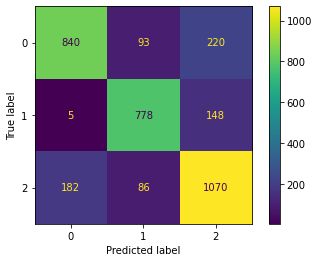

In [26]:
lda_model = LinearDiscriminantAnalysis(solver="svd")
# Entrenamos LDA 
lda = lda_model.fit(X_train, y_train)
    
# Predecimos con el modelo entrenado
lda_pred = lda_model.predict(X_test)

# Para modelo 1
cm = confusion_matrix(y_test, lda_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

El 0 son los atacantes, el 1 los defensores y el 2 los mediocampistas. 
A partir de esta matriz de confusion podemos ver que:
- El modelo logra discriminar bien todas las categorias.
- La mayor confusion del modelo es en (de mayor a menor): 
    - Verdaderos atacantes clasificados como mediocampistas. 220.
    - Verdaderos mediocampistas clasificados como atacantes. 182.
    - Verdaderos defensores clasificados como mediocampistas. 148.

Esto es logico dado que se esperaria que la categoria de mediocampista sea la mas dificil de separar como consecuencia de que reune tanto caracterizticas postivas de los defensores y atacantes. 

El segundo mejor modelo es el Tuned Random Fores, vamos a calcular la matriz de confusion y compararlos.

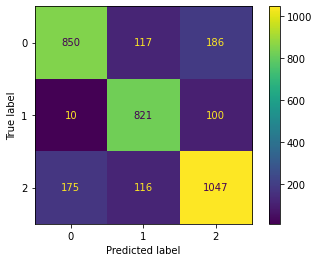

In [17]:
rfc_model = RandomForestClassifier(max_depth= 80,
                                   min_samples_leaf= 3, 
                                   min_samples_split= 12,
                                   n_estimators= 400)# Entrenamos LDA 
rfc = rfc_model.fit(X_train, y_train)
    
# Predecimos con el modelo entrenado
rfc_pred = rfc_model.predict(X_test)

# Para modelo 1
cm = confusion_matrix(y_test, rfc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [18]:
from sklearn.metrics import accuracy_score
print("Linear Discriminant Analysis")
print(accuracy_score(y_test, lda_pred))
print("Random Forest")
print(accuracy_score(y_test, rfc_pred))

Linear Discriminant Analisys
0.7855055523085914
Random Forest
0.7942723553477499


Recordemos que los modelos entrenados por el metodo de hold out son dependientes de la particion aleatoria de los datos, lo que genera que el Random Forest tenga un mejor desempeño en la matriz de confusion, ya que esta ha sido entrenada por este metodo. Luego de entrenar los modelos con cross validation concluimos sin lugar a dudas que el modelo mas parsimonioso y con mejor desempeño fue el Linear Discriminant Analysis.

### Calculamos mas metricas para comparar los dos mejores modelos: 

In [28]:
# Definimos diccionario de desempeño:
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score, average='macro'),
           'recall':make_scorer(recall_score, average='macro'), 
           'f1_score':make_scorer(f1_score, average='macro')}

lda = cross_validate(lda_model, X, y, cv=10, scoring=scoring)
rfc = cross_validate(rfc_model, X, y, cv=10, scoring=scoring)

models_scores_table = pd.DataFrame({'Linear Discriminant Analysis':[lda['test_accuracy'].mean(),
                                                               lda['test_precision'].mean(),
                                                               lda['test_recall'].mean(),
                                                               lda['test_f1_score'].mean()],
                                     'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                    },
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
models_scores_table

,Linear Discriminant Analisys,Random Forest,Best Score
Accuracy,0.786523,0.782197,Linear Discriminant Analisys
Precision,0.792802,0.789309,Linear Discriminant Analisys
Recall,0.789703,0.787775,Linear Discriminant Analisys
F1 Score,0.789722,0.783762,Linear Discriminant Analisys


Para el calculo de las métricas se empleo un macro promedio, lo que hace es calcular la métrica de forma independiente para cada clase y luego computar el promedio (por tanto, tratará todas las clases por igual). Este es recomendado para set de datos con datos desbalanceados. A partir de las distintas metricas obtenidas, sin lugar a dudas el modelo que mejor desempeño tiene es el Linear Discriminant Analysis.

### 3 e) Grafique los datos de prueba sobre las dos primeras componentes principales. Realice dos gráficos, uno coloreando los puntos según la etiqueta real y otro según la clasificacion obtenida por el modelo optimizado en c). Comente acerca de lo observado.

In [21]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=2))
pca_pipe.fit(X)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [22]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X.columns,
    index   = ['PC1', 'PC2']
)

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,release_clause_eur,pace,shooting,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
PC1,0.186362,0.125455,0.124900,0.129605,0.074849,-0.074578,-0.044475,0.120528,0.113701,0.218656,...,0.214852,0.034067,-0.017795,0.212995,0.219479,0.174559,0.188158,-0.022098,-0.032577,-0.041487
PC2,0.176701,0.077801,0.094653,0.109468,0.135031,0.152043,0.161031,0.091263,-0.141096,-0.078838,...,-0.043430,0.256763,0.277577,-0.077112,0.000410,-0.064278,0.133735,0.277138,0.271736,0.264457


Porcentaje de varianza explicada por cada componente
[0.36485613 0.21538644]
----------------------------------------------------
 
Porcentaje de varianza explicada por las primeras dos componentes
0.5802425788910415
----------------------------------------------------


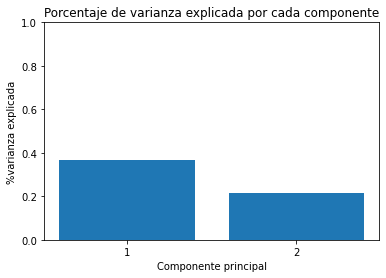

In [23]:
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)
print('----------------------------------------------------')
print(" ")
print('Porcentaje de varianza explicada por las primeras dos componentes')
print(modelo_pca.explained_variance_ratio_[[0,1]].sum())
print('----------------------------------------------------')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('%varianza explicada');

### Grafico en las primerad dos componentes principale de la categoria real. 

Porcentaje de varianza explicada por las primeras dos componentes
0.5802425788910415


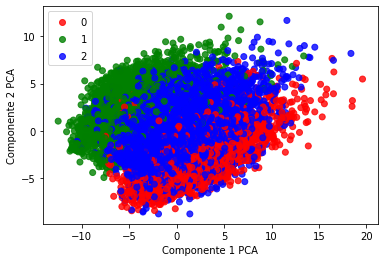

In [24]:
y.replace(['atacante','defensor','mediocampista'],
                        [0, 1, 2], inplace=True)

X_pca = modelo_pca.transform(StandardScaler().fit_transform(X))

print('Porcentaje de varianza explicada por las primeras dos componentes')
print(modelo_pca.explained_variance_ratio_.sum())

# Reproyectamos los datos con la información de la componente 1 al espacio original.
#X_new = modelo_pca.inverse_transform(X_pca)
colors = ['red','green','blue']
graf=plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1],c=y, alpha=0.8, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Componente 1 PCA') # agregamos nombre al eje abscisas
plt.ylabel('Componente 2 PCA') # agregamos nombre al eje ordenadas
plt.axis('equal'); # definimos que el aspecto del gráfico sea igual para cada eje.
plt.legend(*graf.legend_elements())
plt.show()

In [27]:
# Predecimos con el modelo entrenado
lda_pred = lda_model.predict(X)

In [28]:
lda_pred = np.where(lda_pred == "atacante", 0, lda_pred)
lda_pred = np.where(lda_pred == "defensor", 1, lda_pred)
lda_pred = np.where(lda_pred == "mediocampista", 2, lda_pred)
lda_pred = pd.DataFrame(lda_pred)

### Grafico en las primeras dos componentes principales la categoria predicha.

Porcentaje de varianza explicada por las primeras dos componentes
0.5802425788910415


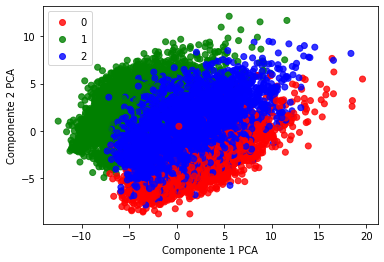

In [29]:
X_pca = modelo_pca.transform(StandardScaler().fit_transform(X))

print('Porcentaje de varianza explicada por las primeras dos componentes')
print(modelo_pca.explained_variance_ratio_.sum())

# Reproyectamos los datos con la información de la componente 1 al espacio original.
#X_new = modelo_pca.inverse_transform(X_pca)
colors = ['red','green','blue']
graf=plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1],c=lda_pred, alpha=0.8, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Componente 1 PCA') # agregamos nombre al eje abscisas
plt.ylabel('Componente 2 PCA') # agregamos nombre al eje ordenadas
plt.axis('equal'); # definimos que el aspecto del gráfico sea igual para cada eje.
plt.legend(*graf.legend_elements())
plt.show()

Lo predicho y lo orignal parece muy similar, a pesar de que se note una mayor densidad de puntos en la etiqueta de clasificados como mediocampistas. En terminos generales las predicciones del modelo parecen estar en lo correcto.

### Incluir visualizacion LDA
Busque entrenar el Linear Discriminant Analysis en las primeras 6 componentes principales que explican un gran porcentaje de la variabilidad de los datos con el objetivo de generar una visualizacion 2D en las primeras dos componentes principales en donde se vea la division en los datos, pero obtengo algun tipo de error ya que los limites del LDA no son lineales y no logre solucionarlo.

In [32]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=6))
pca_pipe.fit(X)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Proyección de las observaciones de entrenamiento
proyecciones = pca_pipe.transform(X=X)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
    index   = X.index
)
proyecciones.shape
proyecciones.head()
proyecciones=proyecciones[["PC1","PC2"]]

print('Porcentaje de varianza explicada por las primeras seis componentes')
print(modelo_pca.explained_variance_ratio_.sum())

Porcentaje de varianza explicada por las primeras seis componentes
0.8167462082742647


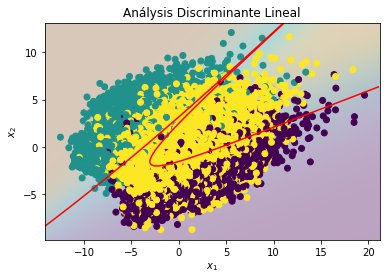

In [31]:
discriminante1 = lda_model.fit(proyecciones, y)

plt.figure()
plt.scatter(proyecciones[["PC1"]],proyecciones[["PC2"]], c=y)

x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = lda_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z[:, 1].reshape(xx.shape)
Z2 = Z[:, 2].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z1, zorder=0, alpha=0.2, shading='auto')
plt.pcolormesh(xx, yy, Z2, zorder=0, alpha=0.2, shading='auto')

plt.contour(xx, yy, Z1, [0.5], colors='red')
plt.contour(xx, yy, Z2, [0.5], colors='red')


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Análysis Discriminante Lineal')
plt.show()


### Entrenamos los modelos en las componentes principales

Como paso alternativo se entrenaron todos los modelos en la base de datos que considera las primeras 6 componentes principales por 10 fold cross validation, estas explican un 81% de la variabilidad total de los datos. Luego de entrenarlos se calcularon todas las métricas de ajuste para evaluar el desempeño.

In [34]:
# Definimos diccionario de desempeño:
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score, average='macro'),
           'recall':make_scorer(recall_score, average='macro'), 
           'f1_score':make_scorer(f1_score, average='macro')}

# Define the models evaluation function
def models_accuracy_cv(X,y,folds):

    # Train machine learning classifier with cross validation
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    knc = cross_validate(knc_model, X, y, cv=folds, scoring=scoring)
    lda = cross_validate(lda_model, X, y, cv=folds, scoring=scoring)
    qda = cross_validate(qda_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    xgb = cross_validate(xgb_model, X, y, cv=folds, scoring=scoring)
    xgrf = cross_validate(xgrf_model, X, y, cv=folds, scoring=scoring)
    
    # Create a data frame with the models accuracy
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                        
                                        'K Neighbor Classifier':[knc['test_accuracy'].mean(),
                                                               knc['test_precision'].mean(),
                                                               knc['test_recall'].mean(),
                                                               knc['test_f1_score'].mean()],
                                        
                                        'Linear Discriminant Analysis':[lda['test_accuracy'].mean(),
                                                               lda['test_precision'].mean(),
                                                               lda['test_recall'].mean(),
                                                               lda['test_f1_score'].mean()],
                                        
                                        'Quadratic Discriminant Analysis':[qda['test_accuracy'].mean(),
                                                               qda['test_precision'].mean(),
                                                               qda['test_recall'].mean(),
                                                               qda['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                               svc['test_precision'].mean(),
                                                               svc['test_recall'].mean(),
                                                               svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                               dtr['test_precision'].mean(),
                                                               dtr['test_recall'].mean(),
                                                               dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                               rfc['test_precision'].mean(),
                                                               rfc['test_recall'].mean(),
                                                               rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                               gnb['test_precision'].mean(),
                                                               gnb['test_recall'].mean(),
                                                               gnb['test_f1_score'].mean()],
                                       
                                       'XGBoost':[xgb['test_accuracy'].mean(),
                                                               xgb['test_precision'].mean(),
                                                               xgb['test_recall'].mean(),
                                                               xgb['test_f1_score'].mean()],
                                       
                                       'XGRandomForest':[xgrf['test_accuracy'].mean(),
                                                               xgrf['test_precision'].mean(),
                                                               xgrf['test_recall'].mean(),
                                                               xgrf['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_accuracy_cv(X,y,10)

C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\sklearn\metrics

[08:20:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:19] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:20] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:27] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:28] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:29] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:30] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:20:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\MEA\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


,Logistic Regression,K Neighbor Classifier,Linear Discriminant Analysis,Quadratic Discriminant Analysis,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,XGBoost,XGRandomForest,Best Score
Accuracy,0.362831,0.357806,0.786523,0.748124,0.424031,0.683111,0.783191,0.387970,0.752034,0.748409,Linear Discriminant Analysis
Precision,0.306581,0.357676,0.792802,0.772168,0.425499,0.691061,0.790817,0.217913,0.770015,0.765505,Linear Discriminant Analysis
Recall,0.352777,0.356503,0.789703,0.758564,0.375702,0.683533,0.788374,0.335663,0.756950,0.752115,Linear Discriminant Analysis
F1 Score,0.279123,0.346383,0.789722,0.745586,0.247080,0.685520,0.784671,0.192487,0.753602,0.750774,Linear Discriminant Analysis


El desempeño para el Linear Discriminant Analysis no varia en la base de datos original respecto a la del PCA, pero se puede notar una leve mejoría para los demás modelos, a pesar de que estos no alcancen el desempeño del LDA. 
Se concluye que el modelo que mejor ajusta a la base de datos es el LDA. 